In [1]:
import pandas as pd, numpy as np
import random
# from bs4 import BeautifulSoup
# from faker import Faker
import seaborn as sns
import math
from matplotlib import pyplot as plt
#initialize Faker
# fake=Faker()

In [2]:
age = []
gender = []
height = []
glucose_level = []
diabetic = []
weight = []
member = []

n_names=2000
for n in range(n_names):
#  Age
    age.append(np.random.choice(np.arange(22,80,3)))
# Gender    
    gender=np.random.choice([0,1],n_names, p=[.55,.45])
# Hight in cm    
    height_val = [147,150,152,155,157,160,163,165,168,170,173,175,178,180,183,185,188,191,193]
    height.append(np.random.choice(height_val))
#  Weight     
    weight.append(np.random.choice(np.arange(40,105,5)))
        
#     physical_cat = ['High','Moderate','Low']
    physical_cat = [2,1,0]
    physical = np.random.choice(physical_cat,n_names,p=['.11','.49','.40'])
    
    life_style_smoker =[0,1]
    life_style = np.random.choice(life_style_smoker,n_names,p=['.88','.12'])
    
#     member_diabetic = ['Father','Mother','Sister','Brother','None','Mother;Father','Father;Mother;Sister','Mother;Sister',
#                       'Mother;Brother','Father;Sister','Father;Brother','Father;Mother;Brother','Father;Mother;Sister;Brother']
#     member_diabetic = np.random.choice(member_diabetic,n_names,p=['.30','.15','.03','.04','.38','.025','0.005','0.005',
#                                                                         '.005','.01','0.02','0.01','0.02'])

    
    member = np.random.choice([0,1],n_names,p=[.60,.40])
    
#     blood_cat = ['Normal','Elivated','High','Very High','Extremely High']
#     blood_cat_claim = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    blood_cat = [0,1,2,3,4]
    blood_pressure = np.random.choice(blood_cat,n_names,p=['.60','.11','.15','.10','.04'])
    
    glucose_level.append(np.random.choice(np.arange(70,310,5)))
    
    
    
variables=[age,gender,height,weight,
           physical,life_style,member,blood_pressure,glucose_level]

df_diabetes=pd.DataFrame(variables).transpose()
df_diabetes.columns=["Age","Gender","Height (centimeters)","Weight (Kg)","Physical Activities",
                     "Life Style (Smoking)","Member Diabetic","Blood Pressure","Glucose Level (Random mg/dl)"]
    
    
    


In [3]:
df_diabetes['BMI'] = df_diabetes.apply(lambda x: round(x["Weight (Kg)"]/(math.pow(x['Height (centimeters)']/100,2)),1),axis=1)

In [4]:
def convert_to_int(x):
    return int(x)

In [5]:
df_diabetes['Age'] = df_diabetes['Age'].apply(lambda x:convert_to_int(x))
df_diabetes['Gender'] = df_diabetes['Gender'].apply(lambda x:convert_to_int(x))
df_diabetes['Height (centimeters)'] = df_diabetes['Height (centimeters)'].apply(lambda x:convert_to_int(x))
df_diabetes['Weight (Kg)'] = df_diabetes['Weight (Kg)'].apply(lambda x:convert_to_int(x))
df_diabetes['Physical Activities'] = df_diabetes['Physical Activities'].apply(lambda x:convert_to_int(x))
df_diabetes['Life Style (Smoking)'] = df_diabetes['Life Style (Smoking)'].apply(lambda x:convert_to_int(x))
df_diabetes['Blood Pressure'] = df_diabetes['Blood Pressure'].apply(lambda x:convert_to_int(x))
df_diabetes['Glucose Level (Random mg/dl)'] = df_diabetes['Glucose Level (Random mg/dl)'].apply(lambda x:convert_to_int(x))

In [6]:
def diabetic_logic(x):
    calculation = 0
    alert = 0
    info = 0
    success = 0
    if x['Glucose Level (Random mg/dl)'] < 140:
        success = 1
    elif x['Glucose Level (Random mg/dl)'] >=140 and  x['Glucose Level (Random mg/dl)'] < 199:
        info = 1
        calculation+=25
    else:
        alert = 1
        calculation+=50
        
#     matching_meb = set(x['Member Diabetic'].split(";")) & set(['Mother','Father','Sister','Brother'])
#     if len(matching_meb) > 0:
#         for i in matching_meb:
#             if i.lower() == "Father".lower():
#                 calculation+=7.5
#             if i.lower() == "Mother".lower():
#                 calculation+=10
#             if i.lower() == "Brother".lower():
#                 calculation+=3.75
#             if i.lower() == "Sister".lower():
#                 calculation+=3.75

    if x['Member Diabetic']:
        calculation+=25
        
        
        
#     if x['Blood Pressure'].lower() == 'High'.lower():
#         calculation+=3
#     elif x['Blood Pressure'].lower() == 'Very High'.lower():
#         calculation+=4
#     elif x['Blood Pressure'].lower() == 'Extremely High'.lower():
#         calculation+=5
        
    if x['Blood Pressure'] == 2:
        calculation+=3
    elif x['Blood Pressure'] == 3: 
        calculation+=4
    elif x['Blood Pressure'] == 4:
        calculation+=5    
    

    if x['BMI'] >=25.0 and x['BMI'] <=29.9:
        # Overweight
        calculation+=4
    elif x['BMI'] >= 30.0:
#         Obesity
        calculation+=5 
        
    if x['Physical Activities'] == 0:
        calculation+=5
        
    if x['Life Style (Smoking)'] == 1:
        calculation+=5
    
    if x['Age'] > 40 and x['Age'] < 60:
        calculation+=4
    elif x['Age'] > 60:
        calculation+=5
        
#     if alert == 1 :
#         return 1, calculation
#     elif alert == 0 :
#         return 0, calculation

#     if calculation >= 60 :
#         return 1, calculation
#     elif calculation < 60 :
#         return 0, calculation
    if success:
        return -1, calculation
    if info:
        if calculation >= 38 and calculation <= 61:
            return 0, calculation
        if calculation < 38:
            return -1, calculation
        if calculation > 61:
            return 1, calculation
    if alert:
        if calculation <= 61:
            return 0, calculation
        else:
            return 1,calculation
    

In [7]:
df_diabetes['Diagnose'],df_diabetes['Severity']= zip(*df_diabetes.apply(lambda x: diabetic_logic(x), axis=1))

In [8]:
df_diabetes.drop(['Severity'],axis=1,inplace=True)

In [9]:
df_diabetes.corr()*100

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
Age,100.000000,1.865477,-0.478686,2.132441,-1.892545,0.336847,3.125700,-0.817604,-2.290053,1.965223,8.393302
Gender,1.865477,100.000000,4.090687,-1.456836,3.162482,3.512062,-0.252591,1.245645,0.001067,-3.796654,1.145250
Height (centimeters),-0.478686,4.090687,100.000000,1.759572,0.727445,-0.884571,-2.381881,4.081329,1.925187,-50.695659,-5.258971
Weight (Kg),2.132441,-1.456836,1.759572,100.000000,0.389733,4.972663,-1.022068,-1.008240,1.933711,83.946058,8.537350
Physical Activities,-1.892545,3.162482,0.727445,0.389733,100.000000,4.785860,-0.512967,-1.687228,-2.307333,-0.599689,-11.358177
Life Style (Smoking),0.336847,3.512062,-0.884571,4.972663,4.785860,100.000000,-2.543490,-2.555099,0.525136,4.451831,6.936954
Member Diabetic,3.125700,-0.252591,-2.381881,-1.022068,-0.512967,-2.543490,100.000000,-0.273633,-2.059427,0.015514,31.377238
Blood Pressure,-0.817604,1.245645,4.081329,-1.008240,-1.687228,-2.555099,-0.273633,100.000000,0.174747,-2.716465,8.211860
Glucose Level (Random mg/dl),-2.290053,0.001067,1.925187,1.933711,-2.307333,0.525136,-2.059427,0.174747,100.000000,0.663866,77.389594
BMI,1.965223,-3.796654,-50.695659,83.946058,-0.599689,4.451831,0.015514,-2.716465,0.663866,100.000000,10.278735


<AxesSubplot:>

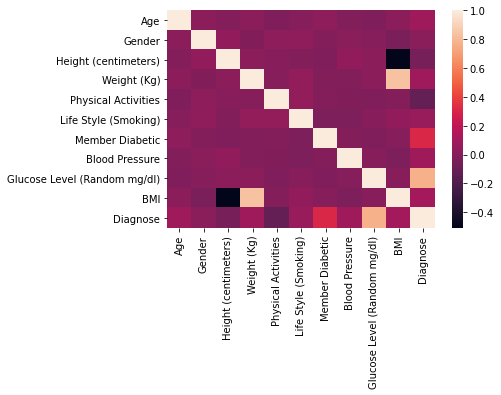

In [10]:
sns.heatmap(df_diabetes.corr())

In [27]:
df_diabetes.head()

,Age,Gender,Height (centimeters),Weight (Kg),Physical Activities,Life Style (Smoking),Member Diabetic,Blood Pressure,Glucose Level (Random mg/dl),BMI,Diagnose
0,55,1,183,65,2,0,0,2,235,19.4,0
1,76,0,160,80,1,0,1,0,95,31.2,-1
2,28,0,160,95,0,0,0,0,75,37.1,-1
3,22,0,188,100,0,0,1,0,200,28.3,1
4,52,0,173,85,1,0,1,2,250,28.4,1
